In [8]:
import keras
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Add, Activation, Input, BatchNormalization, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#import data
import h5py
import numpy as np

train_set = h5py.File('train_signs.h5', 'r')
train_x = np.array(train_set['train_set_x'][:])
train_y = np.array(train_set['train_set_y'][:])
classes = np.array(train_set['list_classes'].shape[0])

test_set = h5py.File('test_signs.h5', 'r')
test_x = np.array(test_set['test_set_x'][:])
test_y = np.array(test_set['test_set_y'][:])

The label of this picture is 5
There are 6 classes


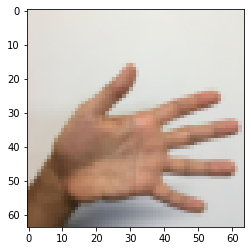

In [10]:
#show our data
plt.imshow(train_x[0])
print('The label of this picture is', train_y[0])
print('There are', classes, 'classes')

In [11]:
#data preprocessing
x_train = train_x / 255
x_test = test_x / 255

y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)

print('trainset has', x_train.shape[0], 'pictures')
print('dataset has', x_test.shape[0], 'pictures')
print('the shape of train data is', x_train.shape)
print('the shape of test data is', x_test.shape)

trainset has 1080 pictures
dataset has 120 pictures
the shape of train data is (1080, 64, 64, 3)
the shape of test data is (120, 64, 64, 3)


In [12]:
def identity_block(x, f):
    
    x_shortcut = x
    
    #convolution path
    x = Conv2D(filters = f, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = f, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    return x

In [13]:
def convolutional_block(x, f):
    
    x_shortcut = x
    
    #convolution path
    x = Conv2D(filters = f, kernel_size = (3, 3), strides = (2, 2), padding = 'same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters = f, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)
    
    return x

In [14]:
x_input = Input(shape = (64, 64, 3))

x = ZeroPadding2D((3, 3))(x_input)

x = Conv2D(64, (7, 7), strides = (2, 2))(x)
x = BatchNormalization(axis = 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides = (2, 2))(x)

x = identity_block(x, 64)
x = identity_block(x, 64)
x = identity_block(x, 64)

x = convolutional_block(x, 128)
x = identity_block(x, 128)
x = identity_block(x, 128)
x = identity_block(x, 128)

x = convolutional_block(x, 256)
x = identity_block(x, 256)
x = identity_block(x, 256)
x = identity_block(x, 256)
x = identity_block(x, 256)
x = identity_block(x, 256)

x = convolutional_block(x, 512)
x = identity_block(x, 512)
x = identity_block(x, 512)

x = AveragePooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(classes, activation = 'softmax')(x)

model = Model(inputs = x_input, outputs = x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [15]:
import time
from keras.callbacks import ModelCheckpoint

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("plain34.h5", monitor='val_acc', verbose=1, mode='max', save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, validation_split=0.15, epochs=100, batch_size=32, callbacks=[checkpoint])
end = time.time()

print("Total time: ", end - start)

Train on 918 samples, validate on 162 samples
Epoch 1/100
918/918 [==============================] - 67s 73ms/step - loss: 1.6971 - acc: 0.2876 - val_loss: 14.0287 - val_acc: 0.1296

Epoch 00001: val_acc improved from -inf to 0.12963, saving model to plain34.h5
Epoch 2/100
918/918 [==============================] - 39s 43ms/step - loss: 1.2470 - acc: 0.4194 - val_loss: 14.0139 - val_acc: 0.1296

Epoch 00002: val_acc did not improve from 0.12963
Epoch 3/100
918/918 [==============================] - 39s 43ms/step - loss: 0.8797 - acc: 0.6144 - val_loss: 13.9952 - val_acc: 0.1296

Epoch 00003: val_acc did not improve from 0.12963
Epoch 4/100
918/918 [==============================] - 40s 43ms/step - loss: 0.8717 - acc: 0.5828 - val_loss: 14.0237 - val_acc: 0.1296

Epoch 00004: val_acc did not improve from 0.12963
Epoch 5/100
918/918 [==============================] - 36s 39ms/step - loss: 0.7931 - acc: 0.6427 - val_loss: 13.1273 - val_acc: 0.1358

Epoch 00005: val_acc improved from 0.129


Epoch 00043: val_acc did not improve from 0.50617
Epoch 44/100
918/918 [==============================] - 39s 43ms/step - loss: 0.1224 - acc: 0.9673 - val_loss: 2.8908 - val_acc: 0.2963

Epoch 00044: val_acc did not improve from 0.50617
Epoch 45/100
918/918 [==============================] - 39s 43ms/step - loss: 0.2007 - acc: 0.9412 - val_loss: 5.5646 - val_acc: 0.2716

Epoch 00045: val_acc did not improve from 0.50617
Epoch 46/100
918/918 [==============================] - 40s 43ms/step - loss: 0.0801 - acc: 0.9782 - val_loss: 5.4065 - val_acc: 0.1420

Epoch 00046: val_acc did not improve from 0.50617
Epoch 47/100
918/918 [==============================] - 39s 43ms/step - loss: 0.1524 - acc: 0.9641 - val_loss: 1.3723 - val_acc: 0.6914

Epoch 00047: val_acc improved from 0.50617 to 0.69136, saving model to plain34.h5
Epoch 48/100
918/918 [==============================] - 39s 43ms/step - loss: 0.1537 - acc: 0.9630 - val_loss: 3.8289 - val_acc: 0.1975

Epoch 00048: val_acc did not imp

918/918 [==============================] - 20s 22ms/step - loss: 0.0785 - acc: 0.9804 - val_loss: 3.3555 - val_acc: 0.2531

Epoch 00087: val_acc did not improve from 0.89506
Epoch 88/100
918/918 [==============================] - 20s 21ms/step - loss: 0.5549 - acc: 0.8660 - val_loss: 4.6118 - val_acc: 0.2346

Epoch 00088: val_acc did not improve from 0.89506
Epoch 89/100
918/918 [==============================] - 23s 25ms/step - loss: 0.4325 - acc: 0.8845 - val_loss: 4.4100 - val_acc: 0.3210

Epoch 00089: val_acc did not improve from 0.89506
Epoch 90/100
918/918 [==============================] - 19s 21ms/step - loss: 0.1641 - acc: 0.9651 - val_loss: 2.4865 - val_acc: 0.3889

Epoch 00090: val_acc did not improve from 0.89506
Epoch 91/100
918/918 [==============================] - 19s 20ms/step - loss: 0.1055 - acc: 0.9847 - val_loss: 3.2787 - val_acc: 0.4383

Epoch 00091: val_acc did not improve from 0.89506
Epoch 92/100
918/918 [==============================] - 19s 21ms/step - loss: 

In [16]:
model = keras.models.load_model("plain34.h5")
pred = model.evaluate(x_test, y_test)
print('loss is', pred[0])
print('accuracy is', pred[1])

120/120 [==============================] - 5s 41ms/step
loss is 0.19381644825140634
accuracy is 0.924999996026357


In [17]:
np.save('p34_100_loss.npy', history.history['loss'])
np.save('p34_100_acc.npy', history.history['acc'])
np.save('p34_100_vloss.npy', history.history['val_loss'])
np.save('p34_100_vacc.npy', history.history['val_acc'])